In [11]:
import numpy as np
from matplotlib import pyplot as plt


In [7]:
################# THIS IS WHERE YOU CHOOSE WHAT TO LOAD ################################

correlation_cut = -1   # if negative none, current other options are 0.9 and 0.8, but more can be added

cut_version = -1   # -1 means OG, otherwise can be 2 or 3 (or more if added)

event_type = "ee"  # could be ee, emu, mumu

weight_cmd = "true"   # could also be "false", "true" or "no-neg"

drop = 0.2  # drop rate

input_type = "allorentz"#"lorentzdelta_gen"

qg_cmd = False

batch_size = 2000

layer_number = "GNN"
layer_num_type = "more"

#This is only here in case format is changed... should be good for all three layer stuff otherwise
if layer_number != "GNN":
    model_name = layer_number + "LayerModel_" + event_type + "_corrCut_" + str(correlation_cut) + "_weights_" + weight_cmd + "_drop_" + str(drop)
else:
    model_name = layer_number + "_Model_" + event_type + "_corrCut_" + str(correlation_cut) + "_weights_" + weight_cmd + "_drop_" + str(drop) 
    
if cut_version > 0:
    model_name += "cutV" + str(cut_version)

if input_type != "all":
    model_name += "_" + input_type
    
if not qg_cmd:
    model_name += "_no_qg"
    
# if batch_size != -1:
#     model_name += "batch_" + str(batch_size)

In [9]:
model_name

'GNN_Model_ee_corrCut_-1_weights_true_drop_0.2_allorentz_no_qgbatch_2000'

In [12]:
validation = np.load("../data/" + layer_num_type + "_layers/" + model_name + "_loss_val_array.npy")
train = np.load("../data/" + layer_num_type + "_layers/" + model_name + "_loss_train_array.npy")

FileNotFoundError: [Errno 2] No such file or directory: '../data/more_layers/GNN_Model_ee_corrCut_-1_weights_true_drop_0.2_allorentz_no_qgbatch_2000_loss_val_array.npy'

In [15]:
print("epochs are " + str(10 * len(train)))

epochs are 6460


In [16]:
train

array([0.58393371, 0.57441968, 0.55944955, 0.56780791, 0.57200158,
       0.55896509, 0.56449431, 0.55812186, 0.55597365, 0.55994594,
       0.55423212, 0.56627673, 0.554681  , 0.55083638, 0.55768007,
       0.5675348 , 0.55506802, 0.55666858, 0.54977208, 0.5596481 ,
       0.55585724, 0.54437393, 0.55974144, 0.56646168, 0.54208016,
       0.5515784 , 0.5535897 , 0.54353392, 0.54778278, 0.54129469,
       0.5530377 , 0.54451269, 0.55334377, 0.55119944, 0.55213851,
       0.54072404, 0.54743373, 0.55435413, 0.55055308, 0.53929979,
       0.54866374, 0.54863197, 0.55184311, 0.55034316, 0.55803603,
       0.54644716, 0.54248464, 0.54652065, 0.5465818 , 0.55924898,
       0.54573011, 0.54359651, 0.53621811, 0.5528124 , 0.54676563,
       0.5498153 , 0.53943175, 0.54658329, 0.56043661, 0.53836   ,
       0.55408704, 0.55895269, 0.54324698, 0.5475232 , 0.54689336,
       0.54540175, 0.5434171 , 0.53833157, 0.55057311, 0.5462482 ,
       0.53706163, 0.55707514, 0.54942292, 0.56209219, 0.54859

Text(0.5, 1.0, 'fiveLayerModel_ee_corrCut_-1.0_weights_true_drop_0.5_lorentzdelta_gen_no_qgbatch_2000')

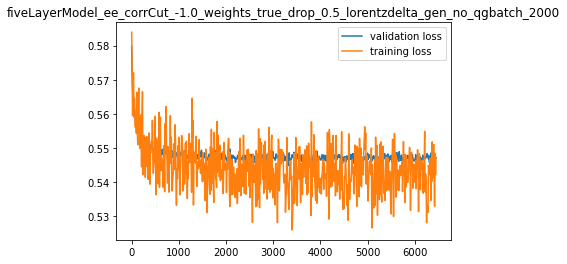

In [17]:
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(10 *np.array(range( len(validation))), validation, label = "validation loss")
ax.plot(10 *np.array(range(len(train))), train, label="training loss")
ax.legend()
plt.title(model_name)
# plt.yscale("log")